In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
image = cv2.imread('img/people2.jpg', cv2.IMREAD_UNCHANGED);

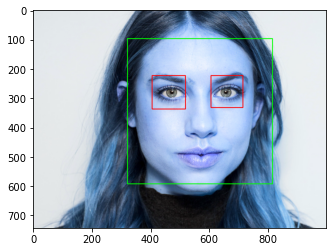

In [41]:
# Given the image above, lets detect faces on the image using haar cascades
# First create a CascadeClassifier using the frontalFace classifier -> Haarcascades/haarcascade_frontalface_default.xml
image = cv2.imread('best-face-oil.png', cv2.IMREAD_UNCHANGED);
face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

# Convert the image to grayscale
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Using the classifiers detect all faces on the image
faces = face_classifier.detectMultiScale(img_gray, minNeighbors = 4)


# If no faces detected print("No faces found")
if faces is ():
    print('No faces found')

# Otherwise draw a rectangle on each face that has been detected
for (x,y,w,h) in faces:
    face = img_gray[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(face, minNeighbors = 10)
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(image, (x+ex,y+ey), (x+ex+ew, y+ey+eh), (255,0,0), 2)
    cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)

plt.imshow(image)

In [42]:
# Encapsulate all the logic to detect faces and eyes in a function and apply it to live video using you webcam
def detect_face_eyes(image, face_classifier, eye_classifier):
    # Convert the image to grayscale
    img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Using the classifiers detect all faces on the image
    faces = face_classifier.detectMultiScale(img_gray, minNeighbors = 4)

    # Otherwise draw a rectangle on each face that has been detected
    for (x,y,w,h) in faces:
        face = img_gray[y:y+h, x:x+w]
        eyes = eye_classifier.detectMultiScale(face, minNeighbors = 10)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(image, (x+ex,y+ey), (x+ex+ew, y+ey+eh), (255,0,0), 2)
        cv2.rectangle(image, (x,y), (x+w, y+h), (0,255,0), 2)

    return image

In [48]:
cap = cv2.VideoCapture(0)
cv2.namedWindow('preview')

face_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('Haarcascades/haarcascade_eye.xml')

if cap.isOpened():  # try to get the first frame
    rval, frame = cap.read()
else:
    rval = False

while rval:
    frame_f = detect_face_eyes(frame, face_classifier, eye_classifier)
    cv2.imshow("preview", frame_f)
    rval, frame = cap.read()
    #out.write(frame_f)
    key = cv2.waitKey(20)
    if key == 27:  # exit on ESC
        break

cap.release()
#out.release()
cv2.destroyWindow("preview")
    
    
